# Theory

## K-Means Clustering
- Attempts to split data into K froups that are closest to K centroids.
- Unsupervised Learning
- Can uncover interesting groupings of people/things/behavior

### Example
- Where millionaires live?
- What genres of music naturally fall out of data?


## How it works
- Randomly picks K centroids
- Assign each data point the centroid it's closest to
- Recompute the centroids based on the average position of each centroid's points
- Iterate until points srop changing assignment to centroids


## K-means Gotchas
- Choosing K
  - Increase K values until the squared error stop getting large reductions
- Avoiding local minima
  - The random choice of initial centroid can yield to different results
  - Run a few times just to  make sure the initial results arent a false positive
- Labelling clusters
  - K-means dont attempt to assign any meaning to the clusters

# Code

In [1]:
from numpy import random, array

# Cria clusters fictícios de renda/idade para N pessoas em k clusters
def createClusteredData(N, k):
    # Define a semente para reprodutibilidade
    random.seed(10)
    # Calcula o número de pontos por cluster
    pointsPerCluster = float(N) / k
    X = []
    for i in range(k):
        # Gera o centroide de renda
        incomeCentroid = random.uniform(20000.0, 200000.0)
        # Gera o centroide de idade
        ageCentroid = random.uniform(20.0, 70.0)
        # Gera pontos ao redor dos centroides
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


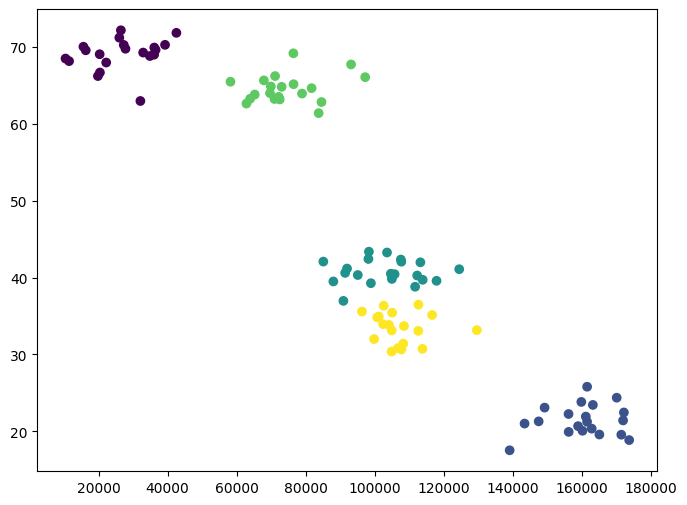

In [14]:
# Importação das bibliotecas
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random

# Cria dados simulados em clusters
data = createClusteredData(100, 5)

# Inicializa o modelo KMeans com 5 clusters
model = KMeans(n_clusters=5)

# Escalando os dados para normalizá-los
# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# Mostra qual o cluster de cada dado
print(model.labels_)

# Plota os scatters com cores para cada cluster
plt.figure(figsize=(8, 6))
plt.scatter(x=data[:,0], y=data[:,1], c=model.labels_.astype(float))
plt.show()

# Activity

In [18]:
# Cria os dados, 1000 pontos em 5 clusters
data = createClusteredData(1000, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


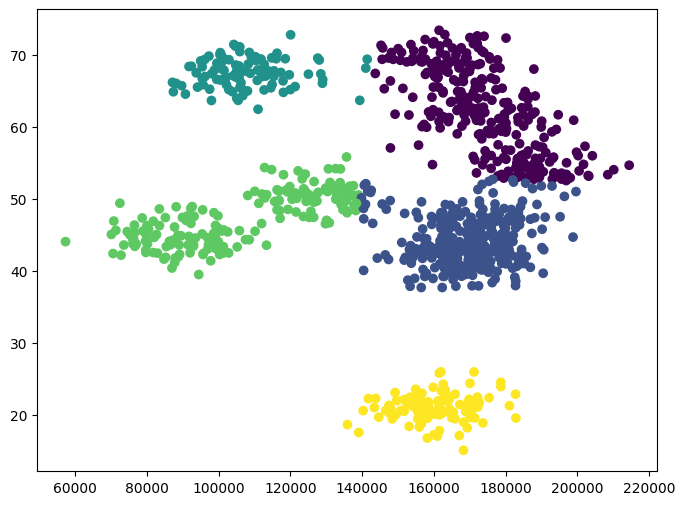

In [20]:
# 5 clusters
n = 5
model = KMeans(n_clusters=n)
model = model.fit(scale(data))

plt.figure(figsize=(8, 6))
plt.scatter(x=data[:,0], y=data[:,1], c=model.labels_.astype(float))
plt.show()

In [22]:
# Inertia na vdd é a soma dos erros quadraticos de cada cluster
print(f'Com 5 clusters o erro quadratico é de {model.inertia_}')

Com 5 clusters o erro quadratico é de 284.6723145419082


In [31]:
# Como comentado em aula, o erro quadratico para de dar grandes saltos
# Justamente onde se espera (9 iteração, sendo que os dados foram gerados em 10 clusters)
for i in range(6, 20):
  model = KMeans(n_clusters=i,  n_init=10)
  model = model.fit(scale(data))
  print(f'Com {i} clusters o erro quadratico é de {model.inertia_}')

Com 6 clusters o erro quadratico é de 201.9768482477004
Com 7 clusters o erro quadratico é de 127.89562942868328
Com 8 clusters o erro quadratico é de 111.03407863424925
Com 9 clusters o erro quadratico é de 97.76385118698487
Com 10 clusters o erro quadratico é de 90.26764319173077
Com 11 clusters o erro quadratico é de 84.17597482434658
Com 12 clusters o erro quadratico é de 78.87727270695996
Com 13 clusters o erro quadratico é de 72.14451443212226
Com 14 clusters o erro quadratico é de 66.99189409114256
Com 15 clusters o erro quadratico é de 61.22721724411561
Com 16 clusters o erro quadratico é de 56.788114807774626
Com 17 clusters o erro quadratico é de 53.295821069869824
Com 18 clusters o erro quadratico é de 47.77089828757486
Com 19 clusters o erro quadratico é de 45.88241732579115


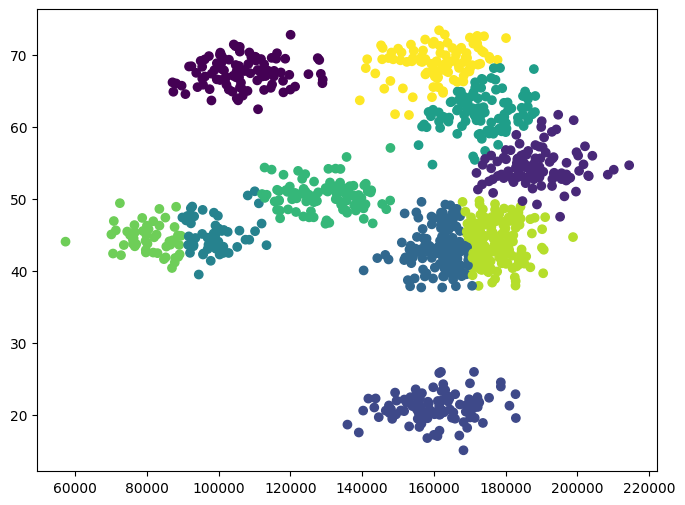

In [32]:
model = KMeans(n_clusters=10, n_init=10)
model = model.fit(scale(data))

plt.figure(figsize=(8, 6))
plt.scatter(x=data[:,0], y=data[:,1], c=model.labels_.astype(float))
plt.show()